# Used cars Project 

## Background and Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

## Objective 

1. Explore and visualize the dataset.

2. Build a linear regression model to predict the prices of used cars.

3. Generate a set of insights and recommendations that will help the business.

## Data Dictionary 

1.S.No. : Serial Number
    
2.Name : Name of the car which includes Brand name and Model name
    
3.Location : The location in which the car is being sold or is available for purchase Cities
    
4.Year : Manufacturing year of the car
    
5.Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
    
6.Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
    
7.Transmission : The type of transmission used by the car. (Automatic / Manual)
    
8.Owner : Type of ownership
    
9.Mileage : The standard mileage offered by the car company in kmpl or km/kg
    
10.Engine : The displacement volume of the engine in CC.
    
11.Power : The maximum power of the engine in bhp.
    
12.Seats : The number of seats in the car.
    
13.New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
    
14.Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)


## Importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

import warnings

warnings.filterwarnings("ignore")

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Read the given Data

In [2]:
data = pd.read_csv("used_cars_data.csv")

# creating a copy of the data so that original data remains unchanged

df = data.copy()

In [3]:
df.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2326,2326,Hyundai Elantra 2.0 SX Option AT,Coimbatore,2015,58239,Petrol,Automatic,First,14.62 kmpl,1999 CC,149.92 bhp,5.0,23.64 Lakh,9.69
1038,1038,Land Rover Range Rover TDV8 (Diesel),Bangalore,2011,55000,Diesel,Automatic,First,10.2 kmpl,4367 CC,308 bhp,7.0,NaN,67.00
3454,3454,Ford Ecosport 1.5 DV5 MT Ambiente,Kochi,2014,71390,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,NaN,5.27
5866,5866,Volkswagen Vento Magnific 1.6 Comfortline,Mumbai,2013,49106,Petrol,Manual,First,15.04 kmpl,1598 CC,103.2 bhp,5.0,NaN,4.40
413,413,BMW 3 Series Luxury Line,Mumbai,2015,41000,Diesel,Automatic,First,21.76 kmpl,1995 CC,190 bhp,5.0,60.88 Lakh,25.50


generates a random sample of the date to see the all the columns and types of rows

In [4]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


gives the top 5 entries of the data

In [5]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


gives the last 5 entries of the given data

In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 7253 rows and 14 columns.


we see that the given data has 7253 rows and 14 columns.

In [7]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

tell the count of null values that are present in all the columns .
Maximum number of null values are there in New_Price and Price i.e 6247 entries in New_Price are null values and 1234 entries in Price are null values.

In [8]:
df.duplicated().sum()

0

there are no duplicated entries in the given data 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


gives the basic information about the entries in the column like data types and count of non-null values 

In [10]:
df.drop(["New_Price"],axis=1,inplace=True)

since there are 6247 null values in New_Price it can be dropped.

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253,NaN,NaN,NaN,3626,2093.91,0,1813,3626,5439,7252
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observation

1.The most commonly occuring power is 74 bhp

2.The most common Engine is 1197 CC

3.The most common mileage is 17 kmpl.

In [12]:
df["Price"].mode()

0    4.5
dtype: float64

In [13]:
df.dropna(subset=["Price","Power"], inplace=True)

In [14]:
df["Seats"].fillna(5, inplace=True)

filling the median value to all the nan values in seats 

In [15]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 5983 rows and 13 columns.


the rows have decreased from 7253 to 5983 and we have removed one column .This will be the modified data shape we can work with 

## check to see null values 



In [16]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

there are 2 null values in Mileage, since it is just 2 entries we can manually input them by researching about the needed input.

In [17]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


top 5 entries of the data set

In [18]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


bottom 5 entries of the data set 

## To see the counts of all the data types including objects 

describe gives the mean,25%,50%,75%,min and max of integer values but gives the frequency and top value of object values  .

In [19]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,5983,NaN,NaN,NaN,3009.37,1739.32,0,1503.5,3011,4514.5,6018
Name,5983,1860,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5983,11,Mumbai,786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5983,NaN,NaN,NaN,2013.38,3.2491,1998,2011,2014,2016,2019
Kilometers_Driven,5983,NaN,NaN,NaN,58684.2,91503.3,171,33965.5,53000,73000,6.5e+06
Fuel_Type,5983,5,Diesel,3197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5983,2,Manual,4271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5983,4,First,4907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5981,442,18.9 kmpl,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,5983,146,1197 CC,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleaning 

In [20]:
df['Mileage']=df['Mileage'].str.rstrip('kmpl')
df['Mileage']=df['Mileage'].str.rstrip('km/kg')
df['Engine']=df['Engine'].str.rstrip('CC')
df['Power']=df['Power'].str.rstrip('bhp')
df['Power']=df['Power'].str.rstrip('null')

df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


Power,Mileage and Engine need to be converted to int/float values to process them so we drop the character parts from them 

In [21]:
df["Engine"].unique()

array(['998 ', '1582 ', '1199 ', '1248 ', '1968 ', '814 ', '1461 ',
       '2755 ', '1598 ', '1462 ', '1497 ', '2179 ', '2477 ', '1498 ',
       '2143 ', '1995 ', '1984 ', '1197 ', '2494 ', '1798 ', '2696 ',
       '2698 ', '1061 ', '1198 ', '2987 ', '796 ', '624 ', '1999 ',
       '1991 ', '2694 ', '1120 ', '2498 ', '799 ', '2393 ', '1399 ',
       '1796 ', '2148 ', '1396 ', '1950 ', '4806 ', '1998 ', '1086 ',
       '1193 ', '2982 ', '1493 ', '2967 ', '2993 ', '1196 ', '1799 ',
       '2497 ', '2354 ', '1373 ', '2996 ', '1591 ', '2894 ', '5461 ',
       '1595 ', '936 ', '1997 ', '1896 ', '1390 ', '1364 ', '2199 ',
       '993 ', '999 ', '1405 ', '2956 ', '1794 ', '995 ', '2496 ',
       '1599 ', '2400 ', '1495 ', '2523 ', '793 ', '4134 ', '1596 ',
       '1395 ', '2953 ', '1586 ', '2362 ', '1496 ', '1368 ', '1298 ',
       '1956 ', '1299 ', '3498 ', '2835 ', '1150 ', '3198 ', '1343 ',
       '1499 ', '1186 ', '1590 ', '2609 ', '2499 ', '2446 ', '1978 ',
       '2360 ', '3436 ', '2198

Engine has nan values that has to be converted to int/float

In [22]:
df["Power"].unique()

array(['58.16 ', '126.2 ', '88.7 ', '88.76 ', '140.8 ', '55.2 ', '63.1 ',
       '171.5 ', '103.6 ', '74 ', '103.25 ', '116.3 ', '187.7 ', '115 ',
       '175.56 ', '98.6 ', '83.8 ', '167.62 ', '190 ', '88.5 ', '177.01 ',
       '80 ', '67.1 ', '102 ', '108.45 ', '138.1 ', '184 ', '179.5 ',
       '103.5 ', '64 ', '82 ', '254.8 ', '73.9 ', '46.3 ', '37.5 ', '77 ',
       '82.9 ', '149.92 ', '138.03 ', '112.2 ', '163.7 ', '71 ', '105 ',
       '174.33 ', '75 ', '103.2 ', '53.3 ', '78.9 ', '147.6 ', '147.8 ',
       '68 ', '186 ', '170 ', '69 ', '140 ', '78 ', '194 ', '500 ',
       '108.5 ', '86.8 ', '187.74 ', 'null ', '132 ', '86.7 ', '73.94 ',
       '117.3 ', '218 ', '168.5 ', '89.84 ', '110 ', '90 ', '82.85 ',
       '67 ', '241.4 ', '35 ', '270.9 ', '126.32 ', '73 ', '130 ',
       '100.6 ', '150 ', '75.94 ', '215 ', '107.3 ', '37.48 ', '120 ',
       '178 ', '152 ', '91.1 ', '85.80 ', '362.07 ', '121.3 ', '143 ',
       '81.80 ', '171 ', '76.8 ', '103.52 ', '444 ', '362.9 ', '67.

power has a value "null" as one of it entries and has to be treated before converting to float .

In [23]:
df["Seats"].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., 10.,  9.,  0.])

Seats have all numeric values and can be converted to int/float

## to check if our conversions disrupted the entries

In [24]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,5983,NaN,NaN,NaN,3009.37,1739.32,0,1503.5,3011,4514.5,6018
Name,5983,1860,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5983,11,Mumbai,786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5983,NaN,NaN,NaN,2013.38,3.2491,1998,2011,2014,2016,2019
Kilometers_Driven,5983,NaN,NaN,NaN,58684.2,91503.3,171,33965.5,53000,73000,6.5e+06
Fuel_Type,5983,5,Diesel,3197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5983,2,Manual,4271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5983,4,First,4907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5981,430,18.9,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,5983,146,1197,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              5983 non-null   int64  
 1   Name               5983 non-null   object 
 2   Location           5983 non-null   object 
 3   Year               5983 non-null   int64  
 4   Kilometers_Driven  5983 non-null   int64  
 5   Fuel_Type          5983 non-null   object 
 6   Transmission       5983 non-null   object 
 7   Owner_Type         5983 non-null   object 
 8   Mileage            5981 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5983 non-null   float64
 12  Price              5983 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 654.4+ KB


all the rows have values no row is missing any values.

In [26]:
df.isna().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [27]:
df[df.Mileage.isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72,41,5.0,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798,73,5.0,12.75


to see the entries where Mileage is null so as to manually input values .

In [28]:
df[df.Engine.isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [29]:
df[df.Power.isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


## Finding names where Mileage is null

In [30]:
df.at[4446,'Name']

'Mahindra E Verito D4'

In [31]:
df.at[4904,'Name']

'Toyota Prius 2009-2016 Z4'

## Manually inputing values into Mileage

In [32]:
for i,row in df.iterrows():
    
    if df.at[i,'Name']=='Mahindra E Verito D4':
        
        df.at[i,'Mileage']=21
        
    elif df.at[i,'Name']=="Toyota Prius 2009-2016 Z4":
        
        df.at[i,'Mileage']=24

In [33]:
df.isna().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

there are no null values throughout the data set 


In [34]:
df["Engine"]=df["Engine"].astype(int)

In [35]:
df["Mileage"]=df["Mileage"].astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              5983 non-null   int64  
 1   Name               5983 non-null   object 
 2   Location           5983 non-null   object 
 3   Year               5983 non-null   int64  
 4   Kilometers_Driven  5983 non-null   int64  
 5   Fuel_Type          5983 non-null   object 
 6   Transmission       5983 non-null   object 
 7   Owner_Type         5983 non-null   object 
 8   Mileage            5983 non-null   float64
 9   Engine             5983 non-null   int64  
 10  Power              5983 non-null   object 
 11  Seats              5983 non-null   float64
 12  Price              5983 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 814.4+ KB


confirming whether Mileage and Engine has been converted to int/float 

## Changing the "null" in Power 

Converting Power to Float data type from object 

In [37]:
df[df['Power']=="null "]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399,null,5.0,2.00
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086,null,5.0,1.30
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086,null,5.0,2.10
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086,null,5.0,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086,null,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086,null,5.0,1.20
5893,5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061,null,5.0,1.75
5925,5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.50,1798,null,5.0,2.85
5943,5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.00,2112,null,6.0,1.70


In [38]:
for i,row in df.iterrows():
    
    power_data=df.at[i,'Power']
    
    if power_data.strip()=='null':
#         print(i)
        
        df.at[i,'Power']='68.0'
        
    else:
    
        power_data=power_data.strip()
    
    
        df.at[i,'Power']=power_data


In [39]:
df["Power"]=df["Power"].astype(float)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5983 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              5983 non-null   int64  
 1   Name               5983 non-null   object 
 2   Location           5983 non-null   object 
 3   Year               5983 non-null   int64  
 4   Kilometers_Driven  5983 non-null   int64  
 5   Fuel_Type          5983 non-null   object 
 6   Transmission       5983 non-null   object 
 7   Owner_Type         5983 non-null   object 
 8   Mileage            5983 non-null   float64
 9   Engine             5983 non-null   int64  
 10  Power              5983 non-null   float64
 11  Seats              5983 non-null   float64
 12  Price              5983 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 814.4+ KB


All the necessary rows have been converted to numeric values and can be used to take statistical data .

In [41]:
df.shape

(5983, 13)

## Statistical analysis 

In [42]:
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
S.No.,5983.0,3009.4,1739.3,0.0,1503.5,3011.0,4514.5,6018.0
Year,5983.0,2013.4,3.2,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,5983.0,58684.2,91503.3,171.0,33965.5,53000.0,73000.0,6500000.0
Mileage,5983.0,18.2,4.5,0.0,15.2,18.2,21.1,33.5
Engine,5983.0,1621.3,601.4,72.0,1198.0,1493.0,1984.0,5998.0
Power,5983.0,112.4,53.7,34.2,74.0,92.7,138.1,560.0
Seats,5983.0,5.3,0.8,0.0,5.0,5.0,5.0,10.0
Price,5983.0,9.5,11.2,0.4,3.5,5.6,10.0,160.0


## Observation
    
* Year of cars range is from 1998 to 2019 with a mean value of 2013.4 and a median of 2014
* Kilometers driven is from 171 to 6.5M years, with a mean value of about 58684.2 km.
* Mileage range is from 0kmpl to 33.5kmpl, the mean is 18.2kmpl.
* Engine is from 72CC to 5998CC , the mean value is around 1621.3CC.
* Power is from around 34.2 bhp to 560bhp, the mean is 112.4bhp.
* Seats is from 0 to 10 seated vehicles , the mean value is 5 seats  
* Price is from 0.4lakhs to 160lakhs the mean value is 9.5 lakhs 

In [43]:
df["Power"].mode()

0    74.0
dtype: float64

In [44]:
df["Mileage"].mode()

0    18.9
dtype: float64

In [45]:
df["Engine"].mode()

0    1197
dtype: int64

In [46]:
df["Fuel_Type"].value_counts()/5983*100 # Percentage of each fuel type sold

Diesel      53.434732
Petrol      45.428715
CNG          0.935985
LPG          0.167140
Electric     0.033428
Name: Fuel_Type, dtype: float64

The most Preferred fuel type is Diesel closely followed by Petrol . Electric is the least used Fuel type 

In [47]:
df["Owner_Type"].value_counts()/5983*100 # Percentage of each owner types

First             82.015711
Second            15.995320
Third              1.855257
Fourth & Above     0.133712
Name: Owner_Type, dtype: float64

Most of the cars are single ownered (82%) and least of them are four owners and above (0.133%)

In [48]:
df["Transmission"].value_counts()/5983*100 # Percentage of preferred transmission type

Manual       71.385593
Automatic    28.614407
Name: Transmission, dtype: float64

Most of the cars are using Manual Transmission (71%)

In [49]:
df["Location"].value_counts()/5983*100

Mumbai        13.137222
Hyderabad     12.385091
Kochi         10.830687
Coimbatore    10.596691
Pune          10.245696
Delhi          9.175999
Kolkata        8.875146
Chennai        8.240013
Jaipur         6.869463
Bangalore      5.916764
Ahmedabad      3.727227
Name: Location, dtype: float64

Most of the cars are sold in Mumbai and Hyderabad and least number of cars are sold in Ahmedabad

In [50]:
df.groupby(['Transmission']).mean().round(1)

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Transmission,,,,,,,,
Automatic,2965.3,2013.9,54966.3,15.7,2096.5,167.1,5.2,19.9
Manual,3027.0,2013.2,60174.5,19.2,1430.8,90.6,5.3,5.3


Manual Transmission cars are driven more kilometers and the mileage is more . It is more preferred by the customers and are liked more .

In [51]:
Name_df=df.copy()

Name_df['Name']= df['Name'].str.lstrip("'").str.rstrip("'")

val_c = Name_df.Name.value_counts()
val_c

Mahindra XUV500 W8 2WD                49
Maruti Swift VDI                      45
Maruti Swift Dzire VDI                34
Honda City 1.5 S MT                   34
Maruti Swift VDI BSIV                 31
                                      ..
Honda City Corporate Edition           1
Renault Scala RxL                      1
BMW X3 xDrive 20d Expedition           1
Ford Figo Aspire 1.5 TDCi Ambiente     1
Maruti Swift ZXI Plus                  1
Name: Name, Length: 1860, dtype: int64

Mahindra XUV500 and Maruti Swift are the most sold cars whereas Maruti Baleno is the least sold 

In [52]:
val_l=df["Location"].value_counts()

In [53]:
threshold = 500

val_l>=500

Mumbai         True
Hyderabad      True
Kochi          True
Coimbatore     True
Pune           True
Delhi          True
Kolkata        True
Chennai       False
Jaipur        False
Bangalore     False
Ahmedabad     False
Name: Location, dtype: bool

Kolkata,Delhi,Pune,Coimbatore,Kochi,Hyderabad and Mumbai sell the most cars and are the ideal locations for getting better results .

In [54]:
threshold=20
val_c[val_c.values>=threshold] 

Mahindra XUV500 W8 2WD              49
Maruti Swift VDI                    45
Maruti Swift Dzire VDI              34
Honda City 1.5 S MT                 34
Maruti Swift VDI BSIV               31
Maruti Ritz VDi                     30
Hyundai i10 Sportz                  30
Toyota Fortuner 3.0 Diesel          29
Hyundai Grand i10 Sportz            27
Honda Amaze S i-Dtech               27
Maruti Ertiga VDI                   25
Honda Brio S MT                     25
Honda City 1.5 V MT                 24
Hyundai Verna 1.6 SX                23
Maruti Wagon R VXI                  23
Maruti Wagon R LXI                  22
Maruti Alto LXi                     21
Maruti Alto 800 LXI                 20
Hyundai EON Era Plus                20
Skoda Superb Elegance 1.8 TSI AT    20
Maruti Ertiga ZDI                   20
BMW 3 Series 320d                   20
Name: Name, dtype: int64

tells us the cars that are preferred by most of the customers , the above cars will be a better fit for better results .

In [55]:
Company_df=df.copy()
Company_df["Company"]=df["Name"].apply(lambda x:x.split(" ")[0])
Company_df["Company"].value_counts()

Maruti           1200
Hyundai          1100
Honda             602
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Lamborghini         1
Smart               1
Bentley             1
Ambassador          1
Name: Company, dtype: int64

The 10 most Preferred brands are :

1.Maruti

2.Hyundai

3.Honda

4.Toyota

5.Mercedes-Benz

6.Volkswagen  

7.Ford

8.Mahindra  

9.BMW     

10.Audi              

In [56]:
val_c=Company_df["Company"].value_counts()
val_c
threshold = 200 #Fine tuning the model

val_c[val_c.values >= threshold]

Maruti           1200
Hyundai          1100
Honda             602
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               262
Audi              236
Name: Company, dtype: int64

In [57]:
top_companies=val_c[val_c.values >= threshold].index.tolist()

print(top_companies)

['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Mercedes-Benz', 'Volkswagen', 'Ford', 'Mahindra', 'BMW', 'Audi']


In [58]:
for i, row in Company_df.iterrows():
    
    if Company_df.at[i,"Company"] not in top_companies:
        
        Company_df.at[i,"Company"]='Others'
print(Company_df["Company"].value_counts(normalize=True)*100)

Maruti           20.056828
Hyundai          18.385425
Others           16.179174
Honda            10.061842
Toyota            6.852749
Mercedes-Benz     5.315059
Volkswagen        5.264917
Ford              5.014207
Mahindra          4.546214
BMW               4.379074
Audi              3.944509
Name: Company, dtype: float64


In [59]:
Company_df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Company              0
dtype: int64

In [60]:
Company_df['Company'].value_counts()

Maruti           1200
Hyundai          1100
Others            968
Honda             602
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               262
Audi              236
Name: Company, dtype: int64

In [61]:
Location_df = pd.DataFrame(
    
    Company_df.Location.values.flatten(), columns=["Location"]
)


val_c = Location_df.Location.value_counts()

val_c

threshold = 500

val_c[val_c.values >= threshold]

Mumbai        786
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       531
Name: Location, dtype: int64

In [62]:
Location_list = val_c[val_c.values >= threshold].index.tolist()
print("Locations taken into consideration:", len(Location_list), Location_list)

Company_df.Location.fillna("Others", inplace=True)
print("Nulls",Company_df.Location.isnull().sum())

Locations taken into consideration: 7 ['Mumbai', 'Hyderabad', 'Kochi', 'Coimbatore', 'Pune', 'Delhi', 'Kolkata']
Nulls 0


In [63]:
Location_df = Company_df.loc[:, ["Name", "Location"]].copy()

for item in Location_list:
    Location_df["Location_" + item] = 0

# creating a column to denote tags other than the ones in the list
Location_df["Location_Others"] = 0

Location_df.shape

(5983, 10)

In [64]:
Location_df.reset_index(inplace=True)
Company_df.reset_index(inplace=True)

In [65]:
#Iterate through all records

for i in range(Location_df.shape[0]):
    
    # iterate over all rows in data
    
    txt = Location_df.Location.values[i]  # getting the values in tags column
    
    flag = 0  # flag variable
    
    for item in Location_list:  # iterate over the list of tags considered
        
        if item in txt:  # checking if tag is in the row
            Location_df.loc[i, "Location_" + item] = 1
            flag = 1
    
    if flag == 0:  # if the row values is different from the list of tags considered
        Location_df.loc[i, "Location_Others"] = 1

Location_df.head()

,index,Name,Location,Location_Mumbai,Location_Hyderabad,Location_Kochi,Location_Coimbatore,Location_Pune,Location_Delhi,Location_Kolkata,Location_Others
0,0,Maruti Wagon R LXI CNG,Mumbai,1,0,0,0,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,0,0,0,0,1,0,0,0
2,2,Honda Jazz V,Chennai,0,0,0,0,0,0,0,1
3,3,Maruti Ertiga VDI,Chennai,0,0,0,0,0,0,0,1
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,0,0,0,1,0,0,0,0


In [66]:
data_req = pd.concat([Company_df, Location_df.iloc[:, 2:]], axis=1)
data_req.head()

,index,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,...,Company,Location,Location_Mumbai,Location_Hyderabad,Location_Kochi,Location_Coimbatore,Location_Pune,Location_Delhi,Location_Kolkata,Location_Others
0,0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,...,Maruti,Mumbai,1,0,0,0,0,0,0,0
1,1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,...,Hyundai,Pune,0,0,0,0,1,0,0,0
2,2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,...,Honda,Chennai,0,0,0,0,0,0,0,1
3,3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,...,Maruti,Chennai,0,0,0,0,0,0,0,1
4,4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,...,Audi,Coimbatore,0,0,0,1,0,0,0,0


In [67]:
data_req.drop(["Name"], axis=1, inplace=True)

In [68]:
data_req.columns

Index(['index', 'S.No.', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Company', 'Location', 'Location_Mumbai', 'Location_Hyderabad',
       'Location_Kochi', 'Location_Coimbatore', 'Location_Pune',
       'Location_Delhi', 'Location_Kolkata', 'Location_Others'],
      dtype='object')

In [69]:
df.groupby(['Price'])['Kilometers_Driven','Mileage'].describe()

Kilometers_Driven                                                \
                   count          mean           std      min      25%   
Price                                                                    
0.44                 1.0  65000.000000           NaN  65000.0  65000.0   
0.45                 3.0  64383.333333  45595.403643  12000.0  49000.0   
0.50                 2.0  54500.000000   3535.533906  52000.0  53250.0   
0.51                 1.0  75000.000000           NaN  75000.0  75000.0   
0.53                 2.0  87575.000000  10712.667735  80000.0  83787.5   
...                  ...           ...           ...      ...      ...   
93.67                1.0  28060.000000           NaN  28060.0  28060.0   
97.07                1.0  26013.000000           NaN  26013.0  26013.0   
100.00               1.0   8000.000000           NaN   8000.0   8000.0   
120.00               1.0   6500.000000           NaN   6500.0   6500.0   
160.00               1.0  25000.000000           NaN  25000.0  25000.0   

                                  Mileage                                      \
            50%      75%      max   count       mean       std    min     25%   
Price                                                                           
0.44    65000.0  65000.0  65000.0     1.0  26.000000       NaN  26.00  26.000   
0.45    86000.0  90575.0  95150.0     3.0  16.233333  1.006645  15.30  15.700   
0.50    54500.0  55750.0  57000.0     2.0  21.050000  7.000357  16.10  18.575   
0.51    75000.0  75000.0  75000.0     1.0  16.100000       NaN  16.10  16.100   
0.53    87575.0  91362.5  95150.0     2.0  21.350000  5.727565  17.30  19.325   
...         ...      ...      ...     ...        ...       ...    ...     ...   
93.67   28060.0  28060.0  28060.0     1.0  12.050000       NaN  12.05  12.050   
97.07   26013.0  26013.0  26013.0     1.0  12.650000       NaN  12.65  12.650   
100.00   8000.0   8000.0   8000.0     1.0  12.500000       NaN  12.50  12.500   
120.00   6500.0   6500.0   6500.0     1.0   6.400000       NaN   6.40   6.400   
160.00  25000.0  25000.0  25000.0     1.0  13.330000       NaN  13.33  13.330   

                              
          50%     75%    max  
Price                         
0.44    26.00  26.000  26.00  
0.45    16.10  16.700  17.30  
0.50    21.05  23.525  26.00  
0.51    16.10  16.100  16.10  
0.53    21.35  23.375  25.40  
...       ...     ...    ...  
93.67   12.05  12.050  12.05  
97.07   12.65  12.650  12.65  
100.00  12.50  12.500  12.50  
120.00   6.40   6.400   6.40  
160.00  13.33  13.330  13.33  

[1369 rows x 16 columns]

## Univariate Analysis

In [70]:
def linedraw(num_col):
    plt.axvline(num_col.mean(), color='g', linestyle='dashed', linewidth=3); # Green dashed line = mean
    plt.axvline(num_col.median(), color='b', linestyle='dashed', linewidth=3); # Blue dashed line = median
    plt.axvline(num_col.mode()[0], color='y', linestyle='dashed', linewidth=3); # Yellow dashed line = mode

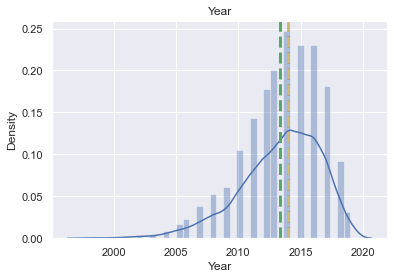

In [71]:
plt.title('Year') # set the plot title
sns.distplot(df['Year'],kde=True); # plot distribution for cars manufacture Year 
linedraw(df['Year']) # plot mean, median and mode values line calling the linedraw function

Most of cars are sold at 2014 and the mean is 2013.4 .

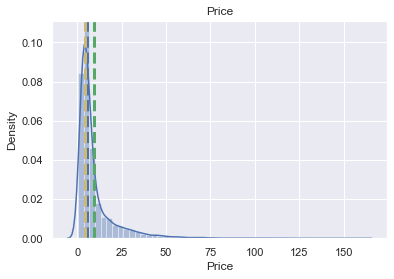

In [72]:
plt.title('Price') # set the plot title
sns.distplot(df['Price'],kde=True); # plot distribution for cars Price 
linedraw(df['Price']) # plot mean, median and mode values line calling the linedraw function

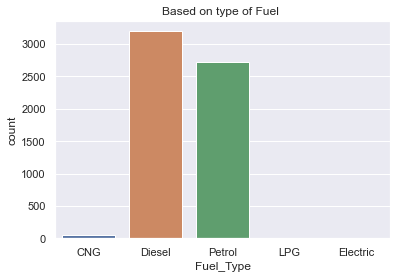

In [73]:
plt.title('Based on type of Fuel ')
sns.countplot(x='Fuel_Type', data=df);

Most of the customers prefer conventional fuels such as Diesel and Petrol. Electric and LPG are least Preferred.

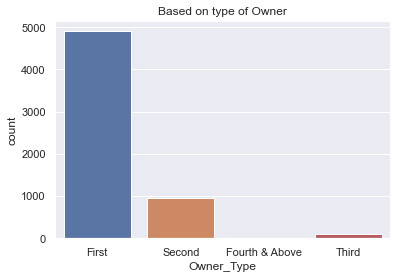

In [74]:
plt.title('Based on type of Owner')
sns.countplot(x='Owner_Type', data=df);

First Owner cars are highly Preferred by customers.

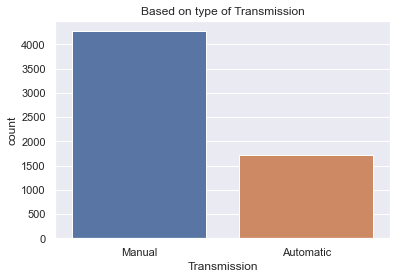

In [75]:
plt.title('Based on type of Transmission')
sns.countplot(x='Transmission', data=df);

Manual Transmission are preferred highly by customers.

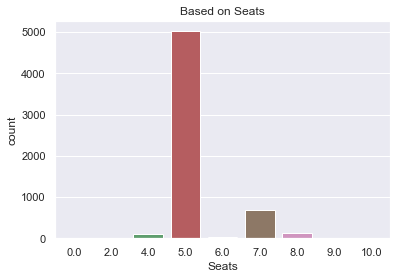

In [76]:
plt.title('Based on Seats')
sns.countplot(x='Seats', data=df);

5 Seated cars are preferred by customers more than the rest of the values .

## Multivariate Analysis 

<Figure size 576x720 with 0 Axes>

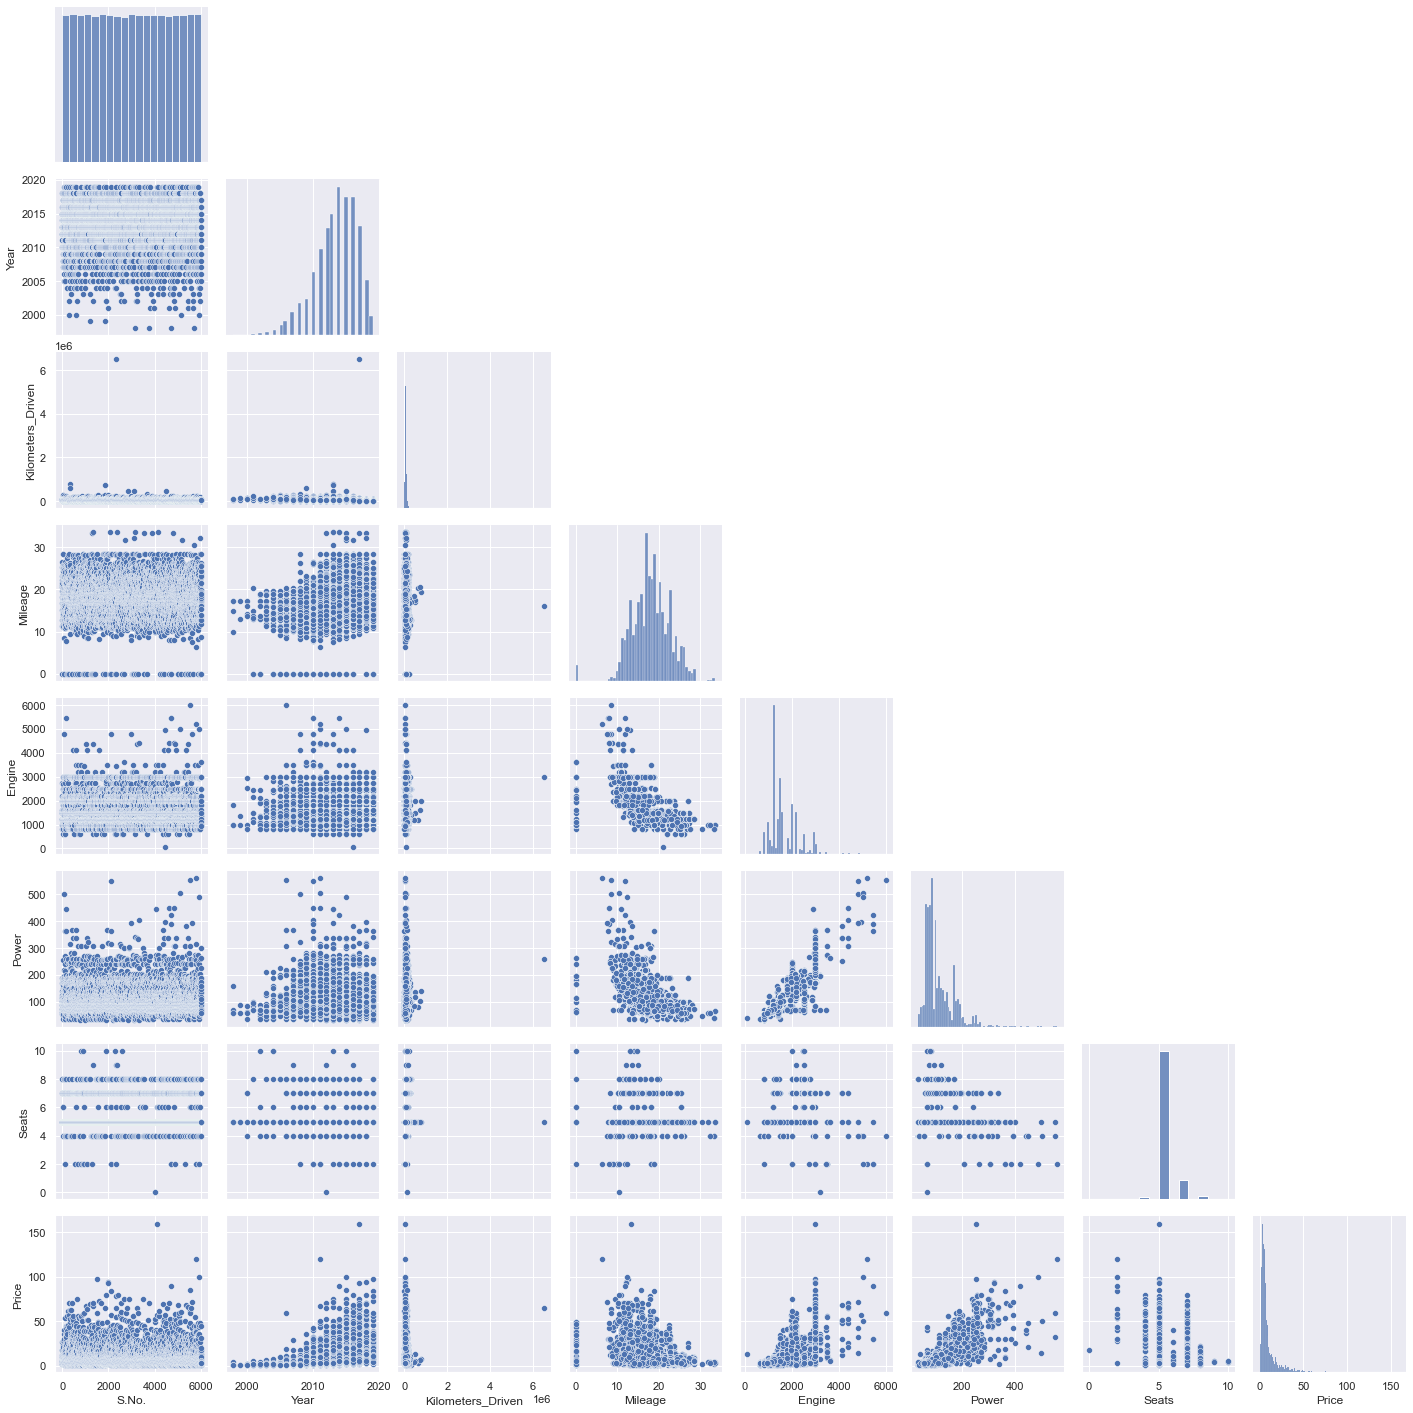

In [77]:
plt.figure(figsize=(8,10))
# scatter plot for all combination of columns, Histogram of each column in the diagonal
sns.pairplot(data=df,corner=True); 

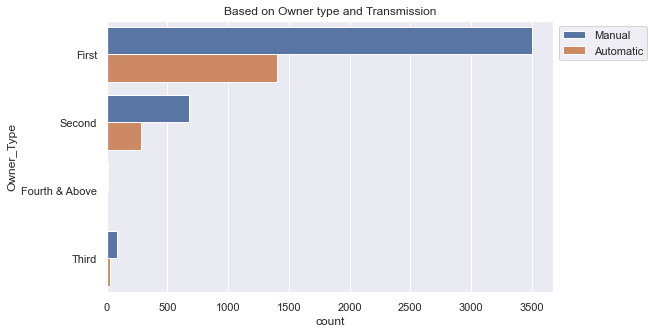

In [78]:
plt.figure(figsize = (8,5)) 
plt.title('Based on Owner type and Transmission')
# For an easy vertical comparison i've placed the product on y-axis
sns.countplot(y='Owner_Type', data=df, hue='Transmission'); 
plt.legend(bbox_to_anchor=(1,1)); #Location of legend

Manual Transmission has a clear higher probability of being picked regardless of owner type.

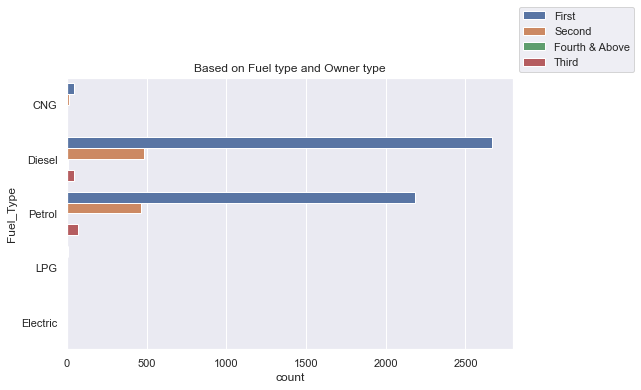

In [79]:
plt.figure(figsize = (8,5)) 
plt.title('Based on Fuel type and Owner type')

# For an easy vertical comparison i've placed the product on y-axis
sns.countplot(y='Fuel_Type', data=df, hue='Owner_Type'); 
plt.legend(bbox_to_anchor=(1,1)); #Location of legend

Diesel and Petrol Second hand vehicles are seen to be close to each other, implying when customers choose 2nd hand vehicles fuel type pf Petrol or Diesel isnt taken into consideration .

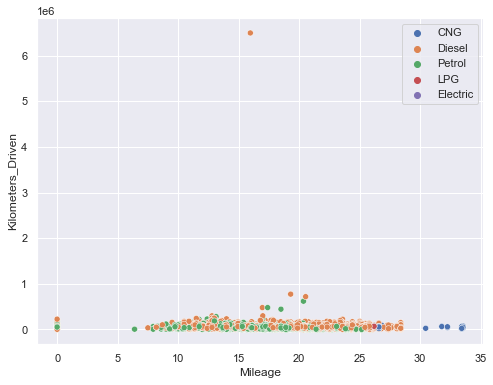

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Mileage',y='Kilometers_Driven', data=df,hue='Fuel_Type');
plt.legend(bbox_to_anchor=(1,1)); #Location of legend

Diesel Vehicles are seen to give better mileage than petrol Vehicles.

## Correlation

In [81]:
df.corr()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
S.No.,1.000000,0.002164,-0.008699,0.021981,-0.004171,-0.010893,-0.010827,-0.019749
Year,0.002164,1.000000,-0.172546,0.313428,-0.052197,0.037729,0.012714,0.306137
Kilometers_Driven,-0.008699,-0.172546,1.000000,-0.065232,0.091068,0.029934,0.083051,-0.011316
Mileage,0.021981,0.313428,-0.065232,1.000000,-0.597467,-0.493547,-0.307451,-0.312733
Engine,-0.004171,-0.052197,0.091068,-0.597467,1.000000,0.859414,0.393122,0.658354
Power,-0.010893,0.037729,0.029934,-0.493547,0.859414,1.000000,0.104786,0.771828
Seats,-0.010827,0.012714,0.083051,-0.307451,0.393122,0.104786,1.000000,0.052413
Price,-0.019749,0.306137,-0.011316,-0.312733,0.658354,0.771828,0.052413,1.000000


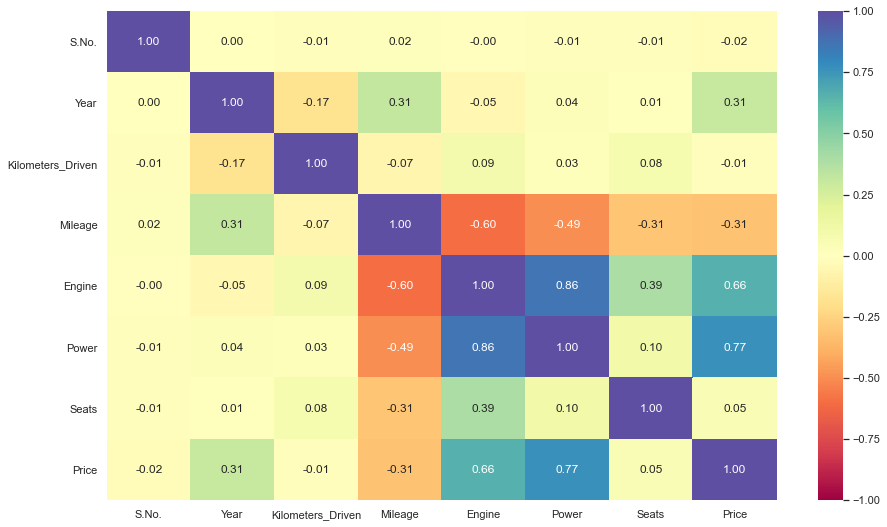

In [82]:
plt.figure(figsize=(15, 9))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral" )
plt.show()

## inference


1.Power and Engine have a strong correlation(0.86)

2.Price and Power have a strong correlation (0.77)

3.Price and Engine have a correlation(0.66)

4.Engine and Seats have a correlation(0.39)

5.Engine and Mileage have a negative correlation (-0.60)

6.Mileage and Power have a negative correlation(-0.49)





## Bivariate Analysis

<AxesSubplot:xlabel='Location', ylabel='Price'>

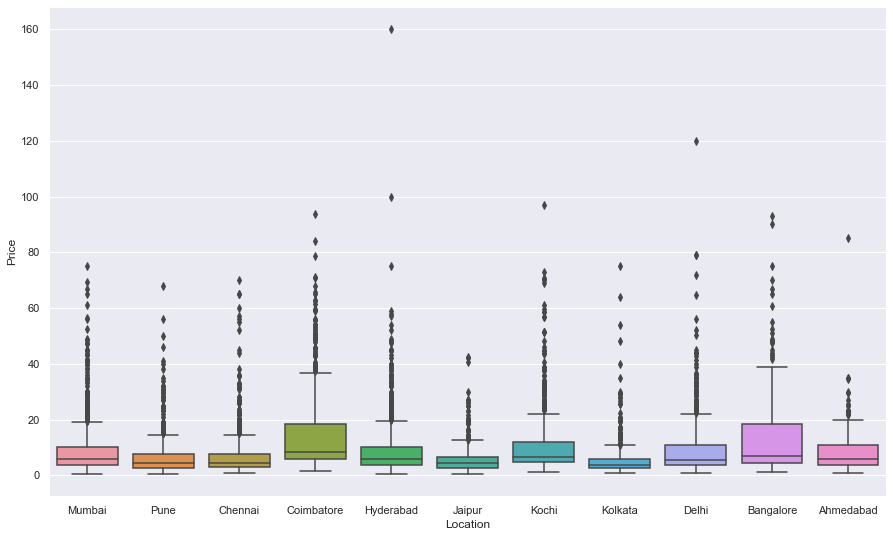

In [83]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="Location", y="Price", data=df)

## observation 

1.The median values are seen to be higher in Coimbatore,Kochi and Bangalore are the highest .

2.Extreme value of prices are seen in all the states .


<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

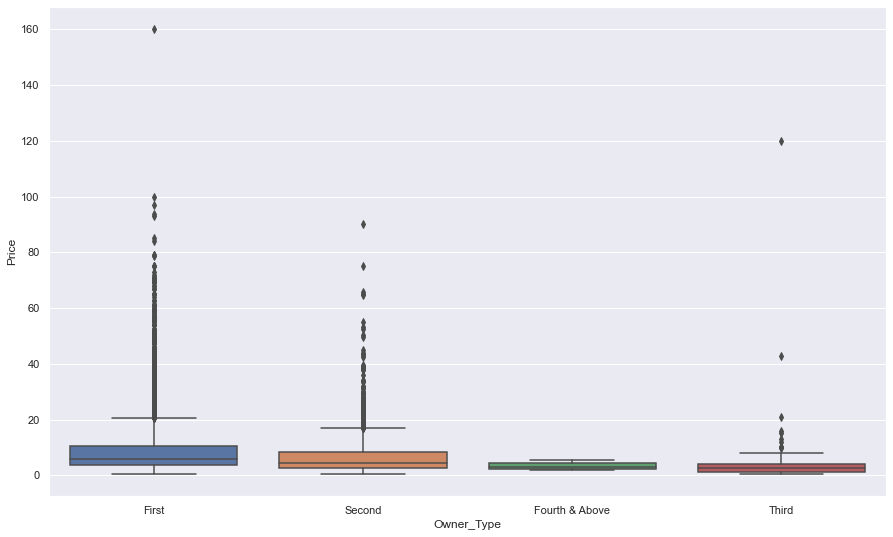

In [84]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="Owner_Type", y="Price", data=df)

First Owners have a higher median value thant Second owners.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

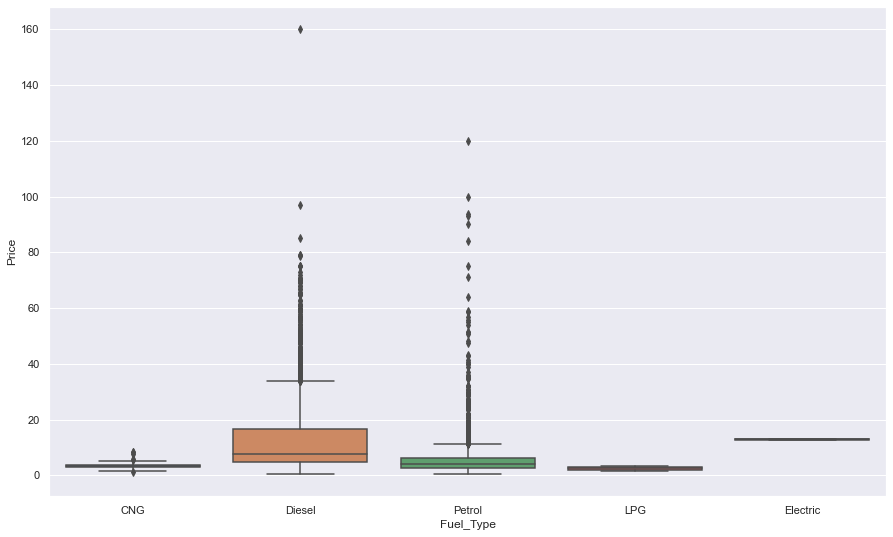

In [85]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="Fuel_Type", y="Price", data=df)

Diesel vehicles have a higher price, however Electric vehicles have the hgihest price .

<AxesSubplot:xlabel='Company', ylabel='Price'>

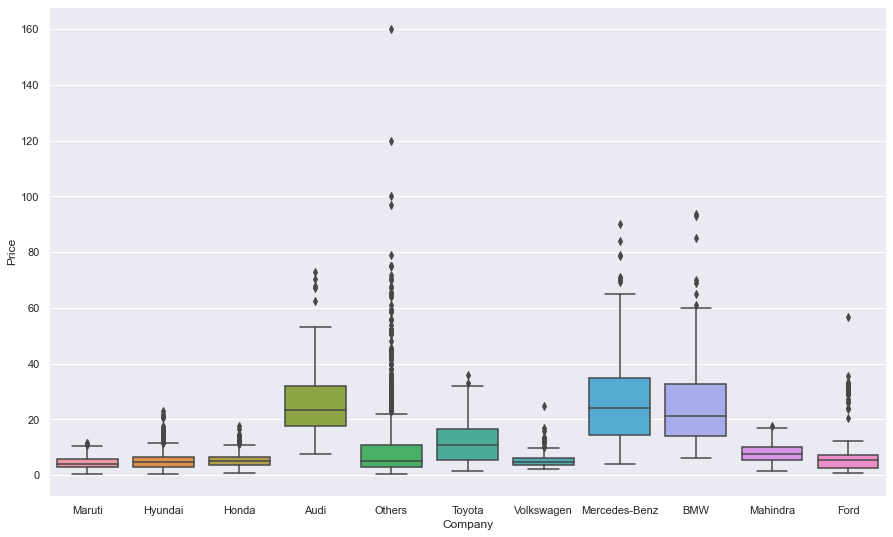

In [86]:
plt.figure(figsize=(15, 9))
sns.boxplot(x="Company", y="Price", data=Company_df)

Audi,Mercedes-Bez and BMW are having higher values amongst the most sold companies .

Maruti,Hyundai,Honda and Mahindra are very lowe cost and have a smaller range in prices excluding the outliers .

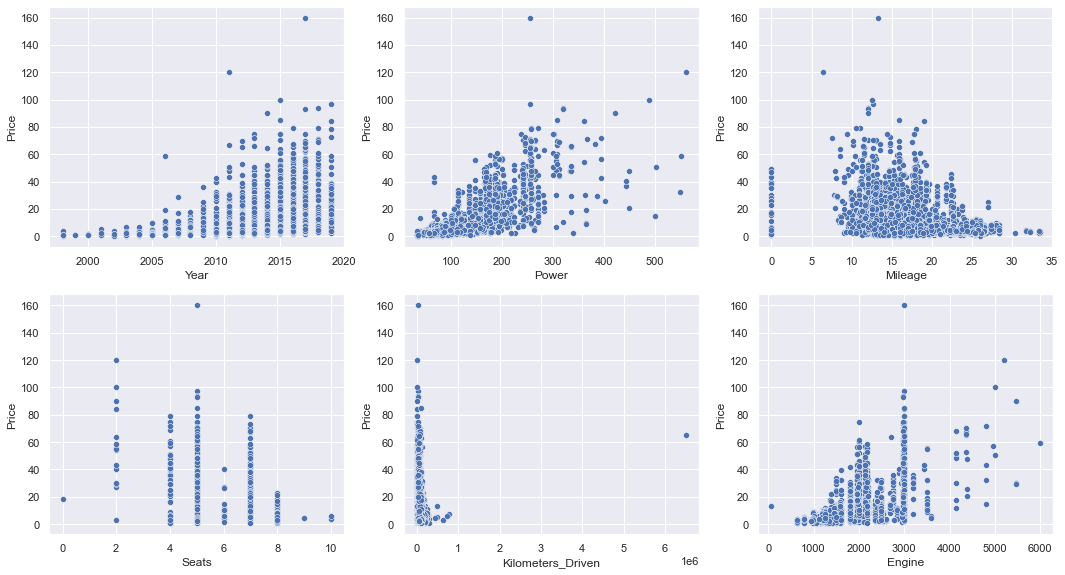

In [87]:
corr_cols = ['Year', 'Power', 'Mileage', 'Seats', 'Kilometers_Driven', 'Engine']


plt.figure(figsize=(18,15))

pos = 1

for i in corr_cols:
    plt.subplot(3, 3, pos)
    
    if i!='Price':
        
        sns.scatterplot(data=df, x=i, y="Price")
#         sns.regplot(data=df, x="Price", y=i, marker="+")
   
        pos += 1 

## Observations

Price 


1.VS Year:- Prices are increasing as years increase 
    
2.VS Power:- most of the prices and Power are centered around 0-80 and 0-300 respectively.

3.VS Mileage:-most of the prices and Mileages are centered around 0-40 and 10-20 respectively.

4.VS Seats:- 5 seated cars are mostly preferred by customers.

5.VS Engine :- As the Engines are having more CC the price seems to increase but there are higher prices for same engine CC as well indicating the efficiency of the engine could also be a factor for price .

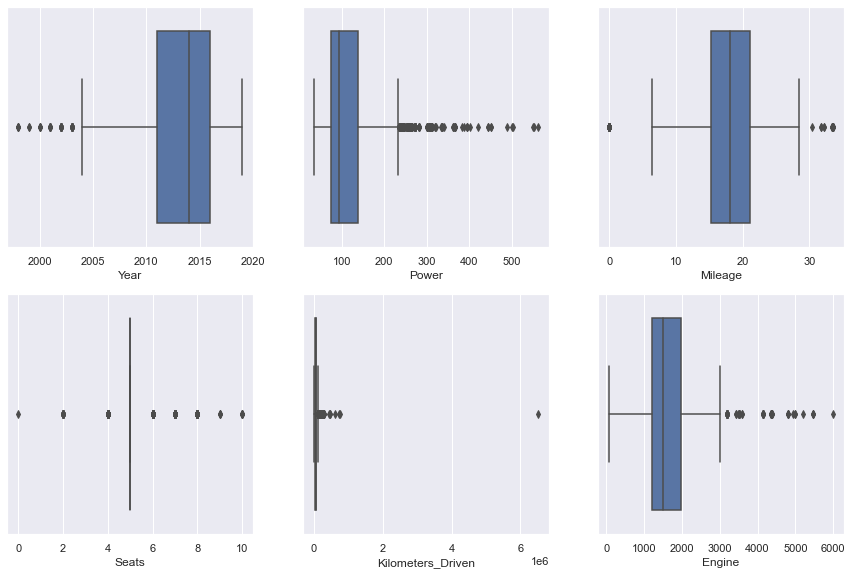

In [88]:
plt.figure(figsize=(15,15))
pos = 1
for i in corr_cols:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[i])
    pos += 1 

## Median 

1. Year is seen to be 2014 however there are outliers lieing before 2005

2. Power is seen to be close to 100 outliers lieing after 220+

3. Kilometers driven has an extreme outlier >6e6

## Log Transformation

In [89]:
data_log_transform=df.copy()

In [90]:
for col in corr_cols:
    
    if col!='Price':
        
        data_log_transform[col] = np.log(data_log_transform[col] + 1)

In [91]:
data_log_transform.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,7.606387,11.184435,CNG,Manual,First,3.317816,6.906755,4.080246,1.791759,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,7.608871,10.621352,Diesel,Manual,First,3.028683,7.367077,4.845761,1.791759,12.50
2,2,Honda Jazz V,Chennai,7.606885,10.736418,Petrol,Manual,First,2.954910,7.090077,4.496471,1.791759,4.50
3,3,Maruti Ertiga VDI,Chennai,7.607381,11.373675,Diesel,Manual,First,3.080533,7.130099,4.497139,2.079442,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,7.607878,10.613271,Diesel,Automatic,Second,2.785011,7.585281,4.954418,1.791759,17.74


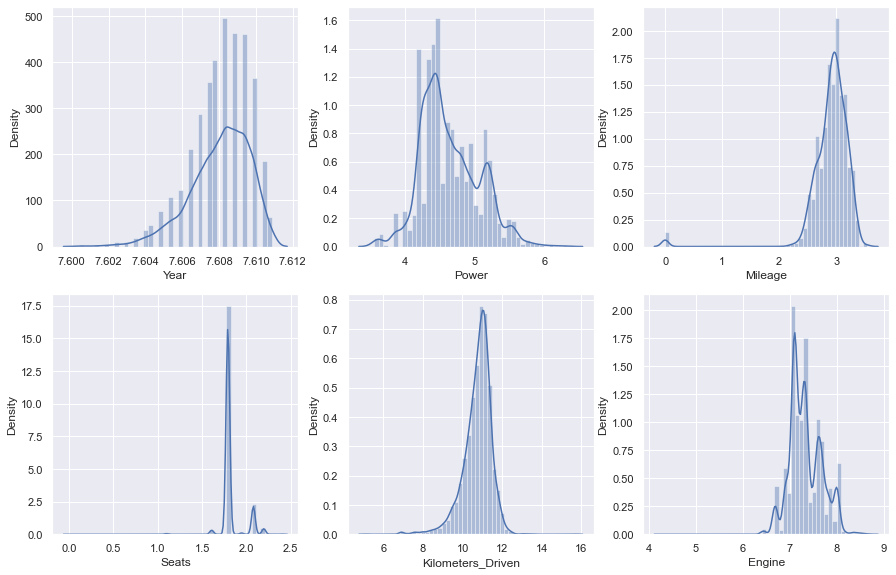

In [92]:
plt.figure(figsize=(15,15))
pos = 1
for i in corr_cols:
    plt.subplot(3, 3, pos)
    sns.distplot(data_log_transform[i],kde=True)
    pos += 1 

## One Hot Encoding 

In [93]:
df2=df.copy()

In [94]:
ind_var = df2.drop(["Price","Name"], axis=1)# to get better result we can drop Name 
dep_var = df2[["Price"]]

In [95]:
def encode_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_num = encode_vars(ind_var)
ind_num.head()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,2010,72000,26.60,998,58.16,5.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,2015,41000,19.67,1582,126.20,5.0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2,2011,46000,18.20,1199,88.70,5.0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,3,2012,87000,20.77,1248,88.76,7.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,4,2013,40670,15.20,1968,140.80,5.0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [96]:
ind_num.shape

(5983, 25)

the column size has increased from 13 to 25 

## Train and Test Data

In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_num, dep_var, test_size=0.3, random_state=7)# 30:70 ratio split for train and test 

In [98]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4188
Number of rows in test data = 1795


Number of rows used in train data is 4188 out of 5983 whereas in test data we use only 1795

In [99]:
df2.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

## Running Regression Model

In [100]:
regression_model=LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [101]:
coef_df = pd.DataFrame(
    np.append(regression_model.coef_.flatten(), regression_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
S.No.,-0.000109
Year,0.877602
Kilometers_Driven,-0.000029
Mileage,-0.225919
Engine,0.001802
Power,0.110987
Seats,-1.099592
Location_Bangalore,2.353811
Location_Chennai,1.398317
Location_Coimbatore,2.230947


to see the coefficients of all the categories .

## Calculating RMSE ,MAE ,R2  and Adjusted R2

In [102]:
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

In [103]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(regression_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(regression_model, x_test, y_test))

Training Performance

      RMSE       MAE       R^2  Adjusted R^2
0  6.10194  3.666575  0.699895      0.698092


Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  7.746961  3.720686  0.533277      0.526681


**Observations**

- The train and test $R^2$ are 0.69 and 0.526,. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict anime ratings within a mean error of 3.72 on the test set.

- The overall performance is much better than the model we built in the previous session.

In [104]:
check_data=coef_df.sort_values(by="Coefficients",ascending=False)# arranging the coefficients in ascending order

In [105]:
check_data.head()# top 5 Coefficients

,Coefficients
Fuel_Type_Electric,7.726669
Location_Hyderabad,2.523064
Location_Bangalore,2.353811
Location_Coimbatore,2.230947
Location_Chennai,1.398317


In [106]:
check_data.tail()# bottom 5 Coefficients 

,Coefficients
Seats,-1.099592
Location_Kolkata,-1.267276
Transmission_Manual,-2.434622
Fuel_Type_Petrol,-3.641272
Intercept,-1757.920682


In [107]:
y_pred = regression_model.predict(x_train)

y_pred                            # predicted y values 

array([[ 28.82697355],
       [  5.8210141 ],
       [ 11.95237163],
       ...,
       [ 13.91918325],
       [-11.97973536],
       [ 15.50750135]])

In [108]:
y_actual=y_train.values
y_actual                          # actual y values 

array([[38.  ],
       [ 4.05],
       [10.11],
       ...,
       [ 9.6 ],
       [ 0.77],
       [ 9.44]])

In [109]:
data_tuples = list(zip(y_actual,y_pred))

result_tuning = pd.DataFrame(data_tuples, columns=['Actual','Predicted'])

result_tuning.head()  # top 5 Actual VS Predicted values 

,Actual,Predicted
0,[38.0],[28.826973548797696]
1,[4.05],[5.8210140986295755]
2,[10.11],[11.952371633171424]
3,[75.0],[30.015655183310173]
4,[7.25],[10.32945269559309]


In [110]:
result_tuning['Residual']=abs(result_tuning['Actual']-result_tuning['Predicted'])# to give the difference between actual and Predicted values

In [111]:
result_tuning.head() # top 5 entries 

,Actual,Predicted,Residual
0,[38.0],[28.826973548797696],[9.173026451202304]
1,[4.05],[5.8210140986295755],[1.7710140986295757]
2,[10.11],[11.952371633171424],[1.8423716331714246]
3,[75.0],[30.015655183310173],[44.98434481668983]
4,[7.25],[10.32945269559309],[3.0794526955930905]


<AxesSubplot:xlabel='Residual', ylabel='Density'>

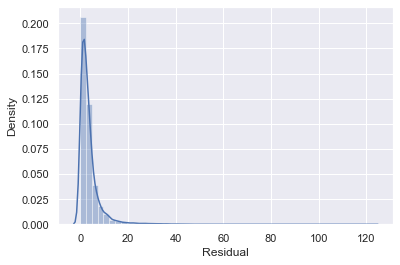

In [112]:
sns.distplot(result_tuning['Residual']) 

Most of the residual values lie between 0 to 20.

## Conclusion for Company :

For better results the company should focus on :

### Locations: 

1.Kolkata

2.Delhi

3.Pune

4.Coimbatore

5.Kochi

6.Hyderabad

7.Mumbai   
        
### Car companies :

1.Maruti

2.Hyundai

3.Honda

4.Toyota

5.Mercedes-Benz

6.Volkswagen

7.Ford

8.Mahindra

9.BMW

10.Audi

###  Top Models :

1.Mahindra XUV500 W8 2WD             

2.Maruti Swift VDI                   

3.Maruti Swift Dzire VDI     

4.Honda City 1.5 S MT                 

5.Maruti Swift VDI BSIV               

6.Maruti Ritz VDi    

7.Hyundai i10 Sportz                  

8.Toyota Fortuner 3.0 Diesel    

9.Hyundai Grand i10 Sportz            

10.Honda Amaze S i-Dtech               

11.Maruti Ertiga VDI     

12.Honda Brio S MT    

13.Honda City 1.5 V MT               

14.Maruti Wagon R VXI                

15.Hyundai Verna 1.6 SX  

16.Maruti Wagon R LXI  

17.Maruti Alto LXi 

18.Maruti Alto 800 LXI 

19.BMW 3 Series 320d   

20.Maruti Ertiga ZDI   

21.Skoda Superb Elegance 1.8 TSI AT  

22.Hyundai EON Era Plus               

        
### Transmission :
    
Manual cars are more preferred .
        
### Fuel type:
    
Diesel cars are slightly more preferred than Petrol

### Owner type: 

Single and Second hand vehicles are still bought by customers however third and fourth and above can be sold for parts to get better profits.

### Seats : 

5 seated cars are preferred by customers 

### Mileage :

Most numbers of cars offer 18.9 kmpl and are preferred by customers ,however the median and mean is 18.2 kmpl.

### Power:

Most of the cars offer 74 bhp and are preferred by customers, the median is 92.7 bhp and the mean is 112.4 bhp.

### Engine :

Most of the cars offer 1197 CC engines and are preferred by customers  , the median is 1493 CC and the mean is 1621.3 CC.
        
### Prices :

4.5 Lakhs is the modal value however 5.64 Lakhs is the median value indicating customers prefer to have cars having 4.5 and as prices increases the amount of customers decrease .





## Conclusion for Regular Customers: 

Customers should prefer to buy cars having :

1.Mileage :18.9 kmpl

2.Power: 74 bhp
    
3.Engine: 1197CC

4.Owner type : Single  or second hand 
    
5.Prices : between 0-20 Lakhs for brands  Maruti,Hyundai,Honda,Toyota,Volkswagon,Ford and Mahindra cars are available .20+ Lakhs for more premium brands like 
Audi,BMW,Mercedees.